# Association Rules Assignment-2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('my_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
##---EDA---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [4]:
df.shape

(10, 15)

In [5]:
df.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [6]:
list(df)

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'Sixth Sense',
 'Gladiator',
 'LOTR1',
 'Harry Potter1',
 'Patriot',
 'LOTR2',
 'Harry Potter2',
 'LOTR',
 'Braveheart',
 'Green Mile']

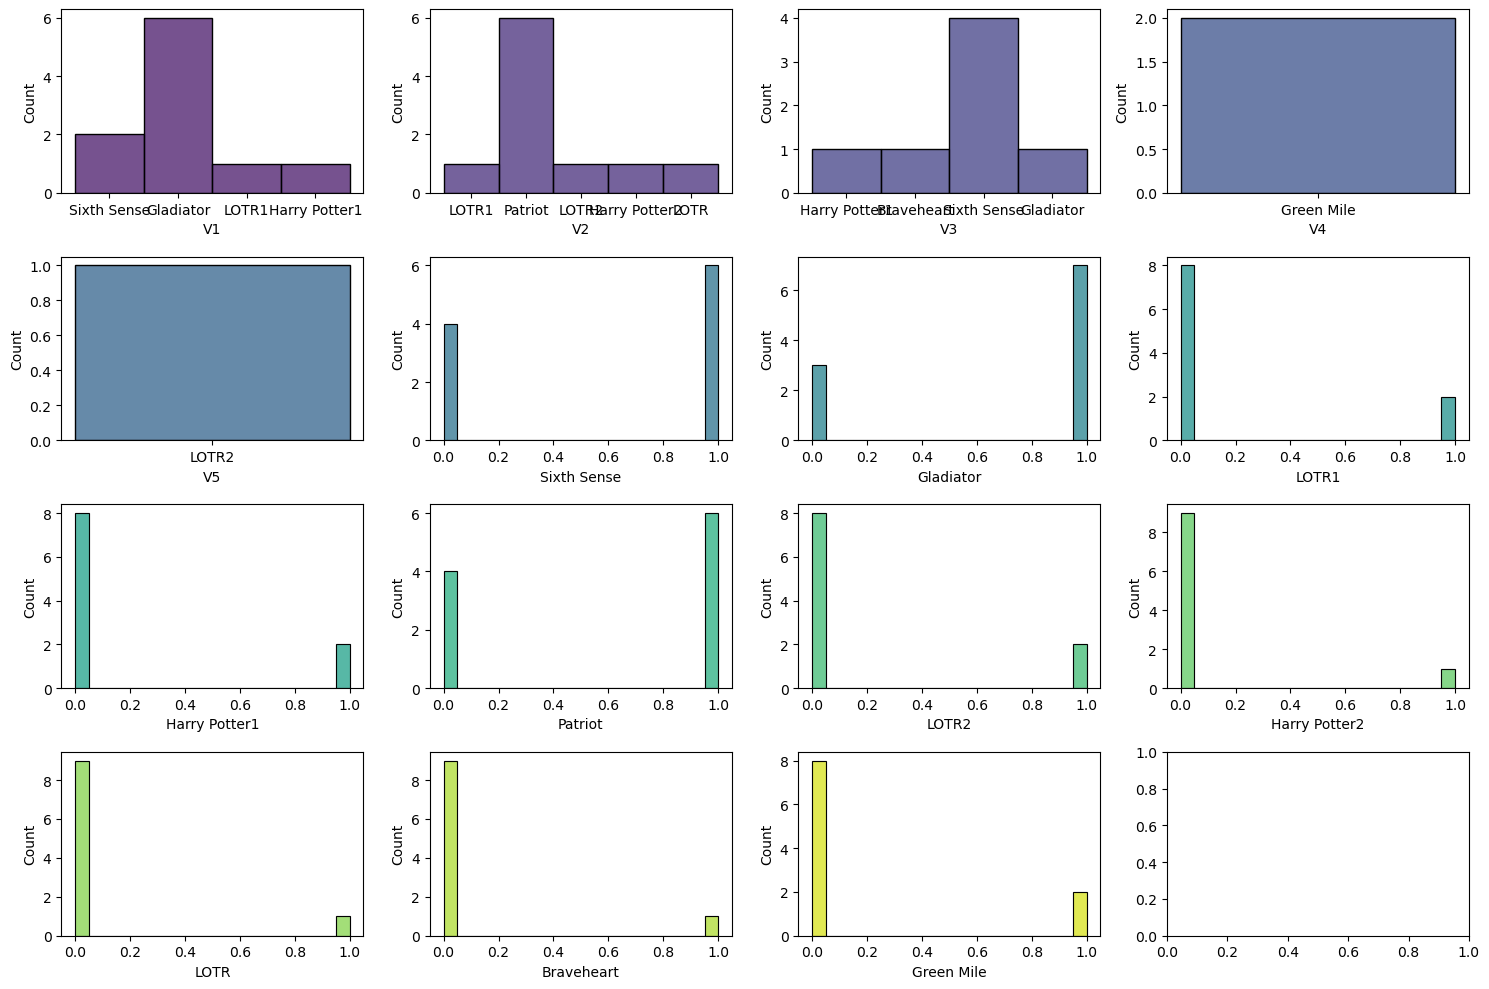

In [7]:
##--Histogram--
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,10))
h1 = ['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1',
      'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.histplot(data=df, x=variable, ax=axes[i // 4, i % 4], color=color, bins=20)
plt.tight_layout()
plt.show()

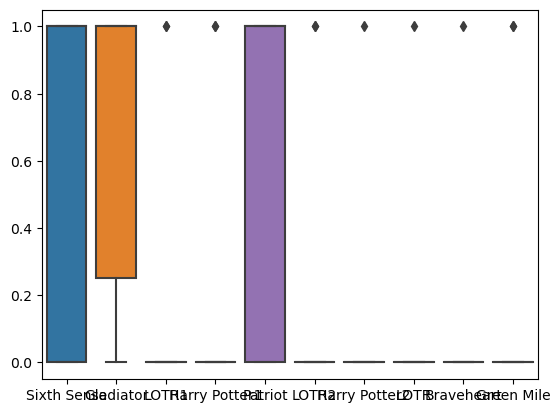

In [8]:
##--Boxplot---
sns.boxplot(df)
plt.show()

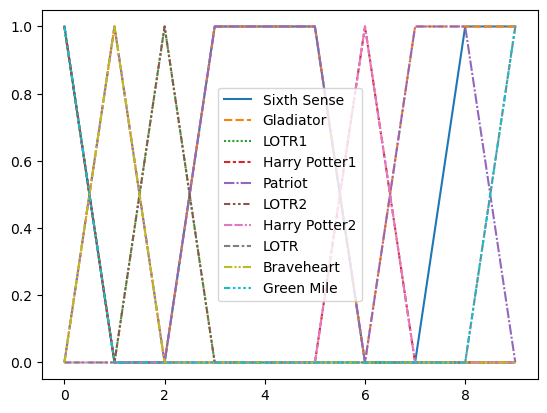

In [9]:
#---line plot 
sns.lineplot(df)
plt.show()

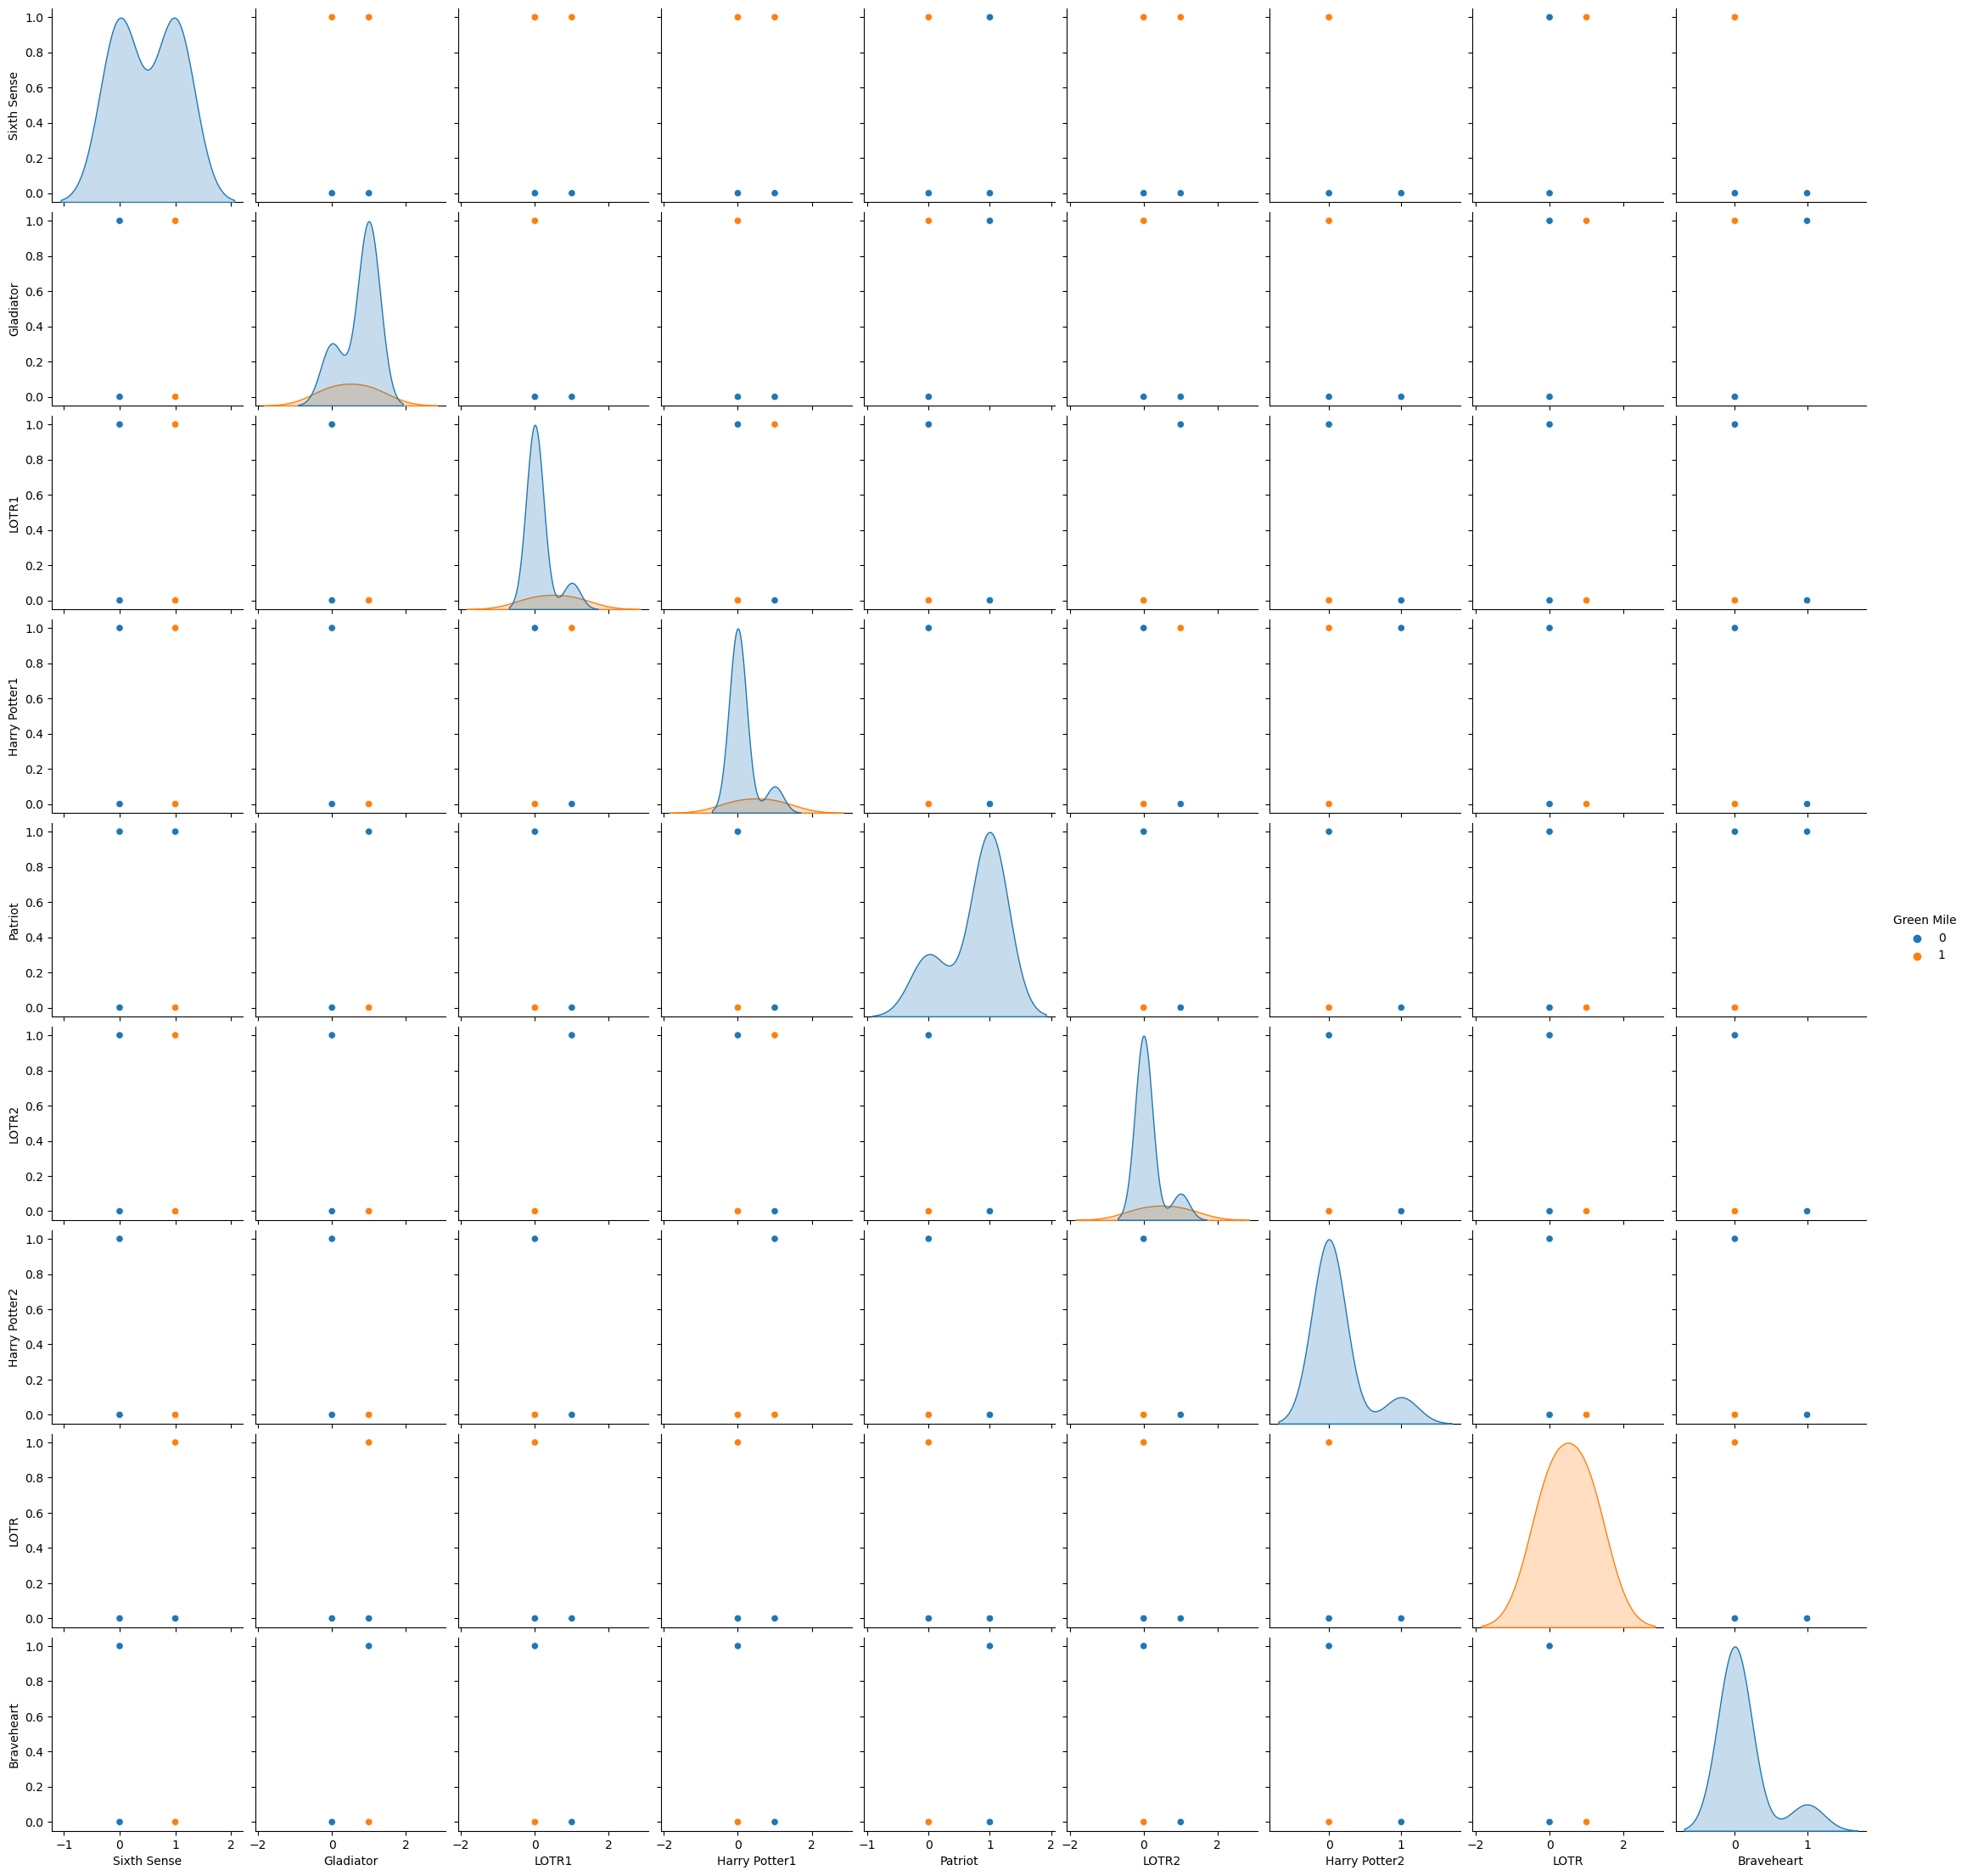

In [11]:
##---pairplot--
sns.pairplot(df,hue='Green Mile')
plt.show()

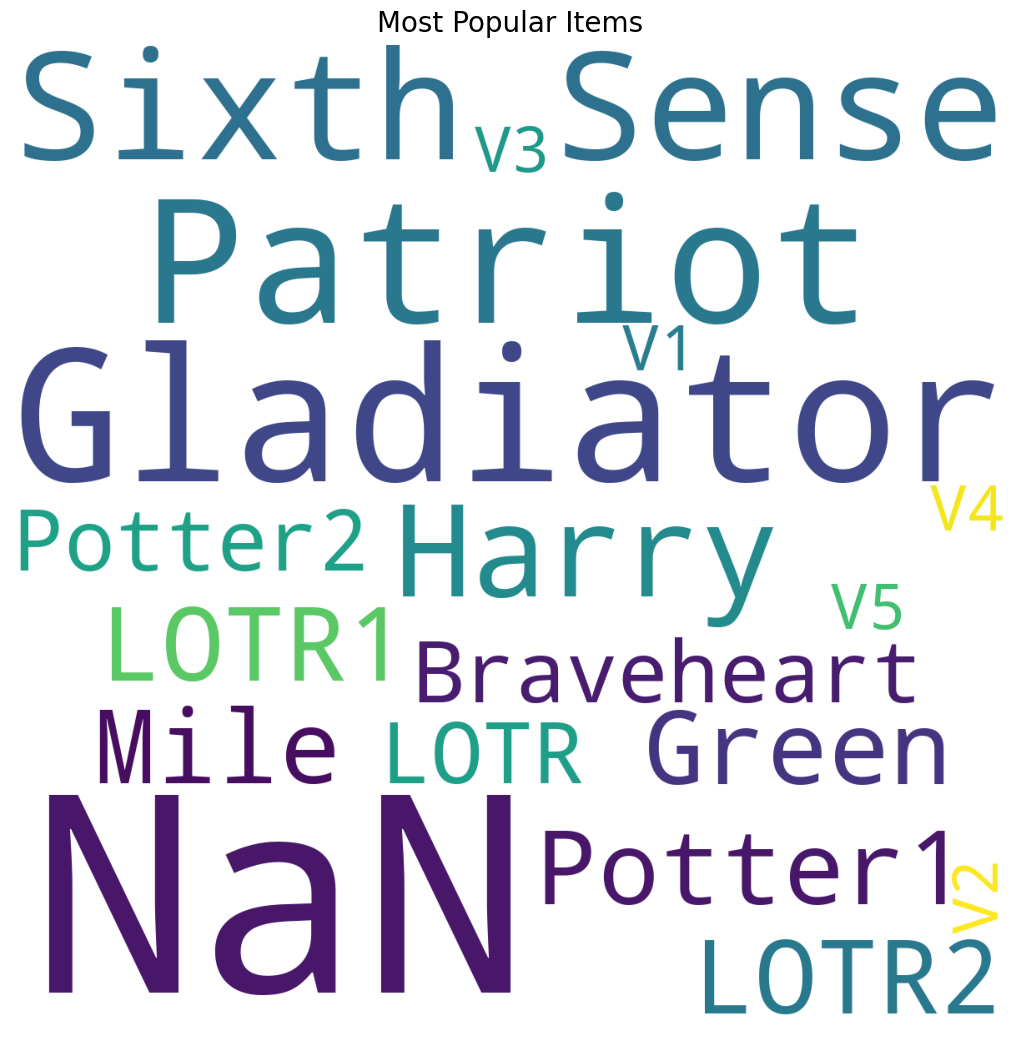

In [10]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(background_color='white', width=1200, height=1200, max_words=121).generate(str(df))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize=20)
plt.show()

In [11]:
##---Label Encoding
Le=LabelEncoder()
df['V1']=Le.fit_transform(df['V1'])
df['V2']=Le.fit_transform(df['V2'])
df['V3']=Le.fit_transform(df['V3'])
df['V4']=Le.fit_transform(df['V4'])
df['V5']=Le.fit_transform(df['V5'])

In [12]:
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,3,2,2,0,0,1,0,1,1,0,1,0,0,0,1
1,0,4,0,1,1,0,1,0,0,1,0,0,0,1,0
2,2,3,4,1,1,0,0,1,0,0,1,0,0,0,0
3,0,4,3,1,1,1,1,0,0,1,0,0,0,0,0
4,0,4,3,1,1,1,1,0,0,1,0,0,0,0,0
5,0,4,3,1,1,1,1,0,0,1,0,0,0,0,0
6,1,0,4,1,1,0,0,0,1,0,0,1,0,0,0
7,0,4,4,1,1,0,1,0,0,1,0,0,0,0,0
8,0,4,3,1,1,1,1,0,0,1,0,0,0,0,0
9,3,1,1,0,1,1,1,0,0,0,0,0,1,0,1


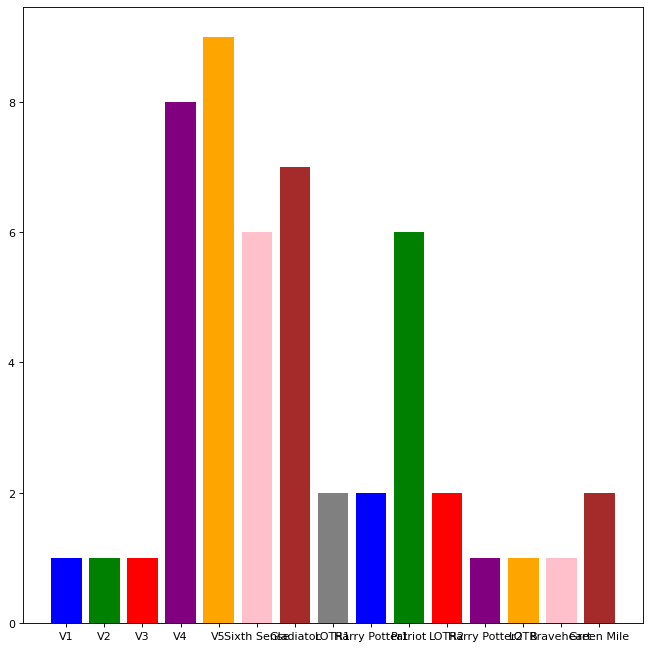

In [13]:
##--bar-plot for movie count
movie_count = []
col_names = df.columns
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray']
for col_name in col_names:
    value_counts = df[col_name].value_counts()
    if 1 in value_counts.index:
        movie_count.append(value_counts[1])
    else:
        movie_count.append(0)  
plt.figure(figsize=(10, 10), dpi=80)
plt.bar(col_names, movie_count,color=colors)
plt.show()

In [14]:
###---Boolean values--
df = df.astype(bool)
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,True,True,True,False,False,True,False,True,True,False,True,False,False,False,True
1,False,True,False,True,True,False,True,False,False,True,False,False,False,True,False
2,True,True,True,True,True,False,False,True,False,False,True,False,False,False,False
3,False,True,True,True,True,True,True,False,False,True,False,False,False,False,False
4,False,True,True,True,True,True,True,False,False,True,False,False,False,False,False
5,False,True,True,True,True,True,True,False,False,True,False,False,False,False,False
6,True,False,True,True,True,False,False,False,True,False,False,True,False,False,False
7,False,True,True,True,True,False,True,False,False,True,False,False,False,False,False
8,False,True,True,True,True,True,True,False,False,True,False,False,False,False,False
9,True,True,True,False,True,True,True,False,False,False,False,False,True,False,True


In [15]:
###---Apriori Algorithm for min_support=0.1
frequent_itemsets1=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets1 

,support,itemsets
0,0.4,(V1)
1,0.9,(V2)
2,0.9,(V3)
3,0.8,(V4)
4,0.9,(V5)
...,...,...
726,0.4,"(V5, V3, V2, Patriot, Sixth Sense, V4, Gladiator)"
727,0.1,"(V5, LOTR, V3, V2, Sixth Sense, Green Mile, Gl..."
728,0.1,"(V3, V2, LOTR1, Sixth Sense, LOTR2, Harry Pott..."
729,0.1,"(V1, V5, LOTR, V3, V2, Sixth Sense, Green Mile..."


In [16]:
frequent_itemsets1 = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.4,(V1),1
1,0.9,(V2),1
2,0.9,(V3),1
3,0.8,(V4),1
4,0.9,(V5),1
...,...,...,...
726,0.4,"(V5, V3, V2, Patriot, Sixth Sense, V4, Gladiator)",7
727,0.1,"(V5, LOTR, V3, V2, Sixth Sense, Green Mile, Gl...",7
728,0.1,"(V3, V2, LOTR1, Sixth Sense, LOTR2, Harry Pott...",7
729,0.1,"(V1, V5, LOTR, V3, V2, Sixth Sense, Green Mile...",8


In [17]:
#--Rules when min_support =0.1 min_threshold  for lift is 0.5

rules1=association_rules(frequent_itemsets1,metric='lift',min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V2),(V1),0.9,0.4,0.3,0.333333,0.833333,-0.06,0.90,-0.666667
1,(V1),(V2),0.4,0.9,0.3,0.750000,0.833333,-0.06,0.40,-0.250000
2,(V1),(V3),0.4,0.9,0.4,1.000000,1.111111,0.04,inf,0.166667
3,(V3),(V1),0.9,0.4,0.4,0.444444,1.111111,0.04,1.08,1.000000
4,(V1),(V4),0.4,0.8,0.2,0.500000,0.625000,-0.12,0.40,-0.500000
...,...,...,...,...,...,...,...,...,...,...
16239,(LOTR1),"(V1, V3, V2, Sixth Sense, LOTR2, Harry Potter1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
16240,(Sixth Sense),"(V1, V3, V2, LOTR1, LOTR2, Harry Potter1, Gree...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
16241,(LOTR2),"(V1, V3, V2, LOTR1, Sixth Sense, Harry Potter1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
16242,(Harry Potter1),"(V1, V3, V2, LOTR1, Sixth Sense, LOTR2, Green ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


Text(0.5, 1.0, 'Support vs Confidence')

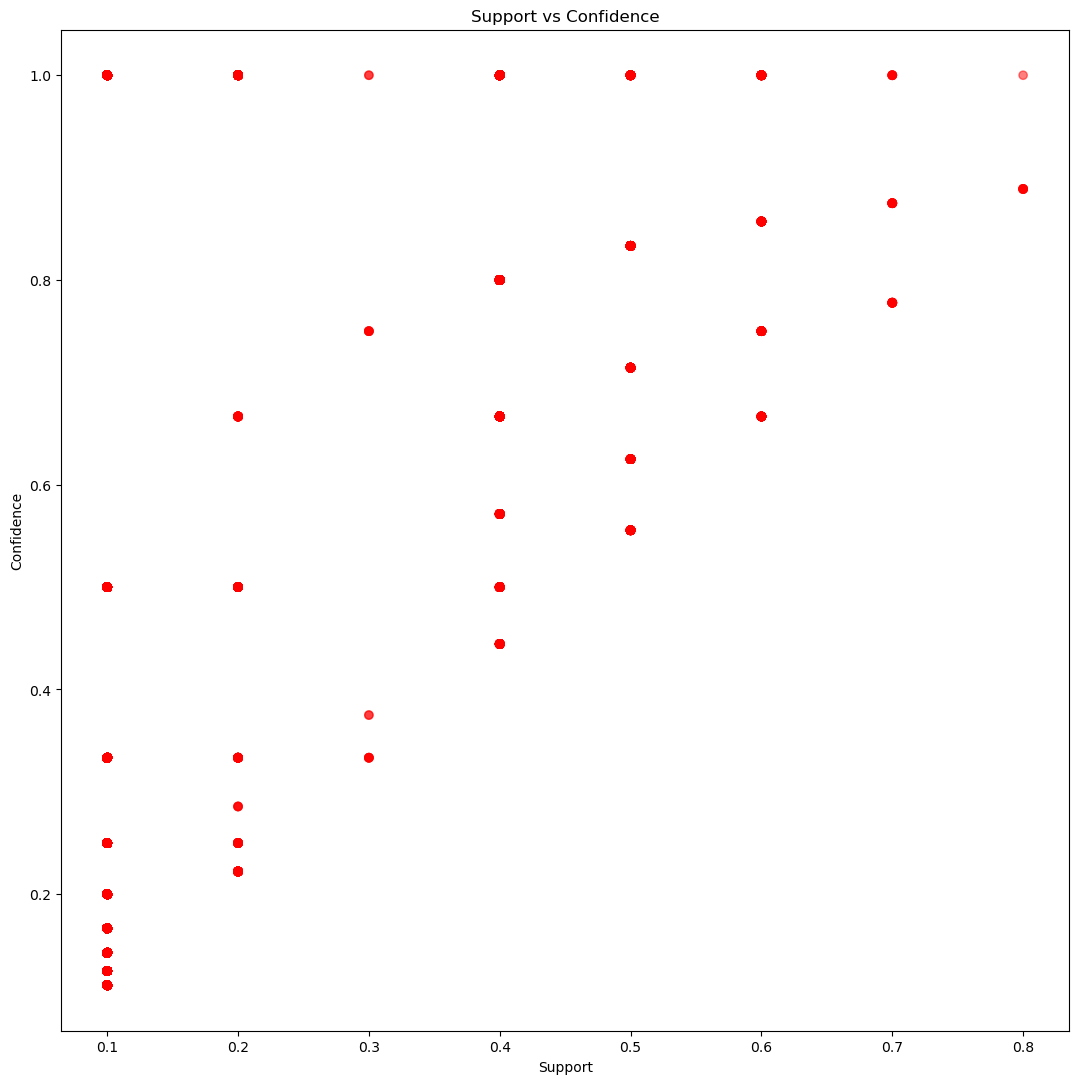

In [18]:
threshold = 0.1
rules1['color'] = ['red' if conf >= threshold else 'blue' for conf in rules1['confidence']]
plt.scatter(rules1['support'], rules1['confidence'], c=rules1['color'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')


In [19]:
##-Rules when min_support = 0.1 and min_threshold for confidence is 0.5

rules2 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.5)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V1),(V2),0.4,0.9,0.3,0.75,0.833333,-0.06,0.4,-0.250000
1,(V1),(V3),0.4,0.9,0.4,1.00,1.111111,0.04,inf,0.166667
2,(V1),(V4),0.4,0.8,0.2,0.50,0.625000,-0.12,0.4,-0.500000
3,(V1),(V5),0.4,0.9,0.3,0.75,0.833333,-0.06,0.4,-0.250000
4,(V1),(Sixth Sense),0.4,0.6,0.2,0.50,0.833333,-0.04,0.8,-0.250000
...,...,...,...,...,...,...,...,...,...,...
12759,"(Green Mile, Harry Potter1)","(V1, V3, V2, LOTR1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.00,10.000000,0.09,inf,1.000000
12760,(LOTR1),"(V1, V3, V2, Sixth Sense, LOTR2, Harry Potter1...",0.2,0.1,0.1,0.50,5.000000,0.08,1.8,1.000000
12761,(LOTR2),"(V1, V3, V2, LOTR1, Sixth Sense, Harry Potter1...",0.2,0.1,0.1,0.50,5.000000,0.08,1.8,1.000000
12762,(Harry Potter1),"(V1, V3, V2, LOTR1, Sixth Sense, LOTR2, Green ...",0.2,0.1,0.1,0.50,5.000000,0.08,1.8,1.000000


In [20]:
rules2 = rules2.sort_values(['confidence', 'lift'], ascending =[False, False])
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
236,"(V1, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.0
239,(LOTR),"(V1, Gladiator)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.0
683,"(V4, Harry Potter1)",(Harry Potter2),0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.0
684,(Harry Potter2),"(V4, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.0
728,"(V5, Harry Potter1)",(Harry Potter2),0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
4202,"(LOTR2, V1, LOTR1, V3)",(V5),0.2,0.9,0.1,0.5,0.555556,-0.08,0.2,-0.5
5228,"(V2, Green Mile, Sixth Sense, V3)",(V5),0.2,0.9,0.1,0.5,0.555556,-0.08,0.2,-0.5
5304,"(V2, LOTR2, LOTR1, V3)",(V5),0.2,0.9,0.1,0.5,0.555556,-0.08,0.2,-0.5
6882,"(V1, V3, V2, Sixth Sense, Green Mile)",(V5),0.2,0.9,0.1,0.5,0.555556,-0.08,0.2,-0.5


Text(0.5, 1.0, 'Support vs Confidence')

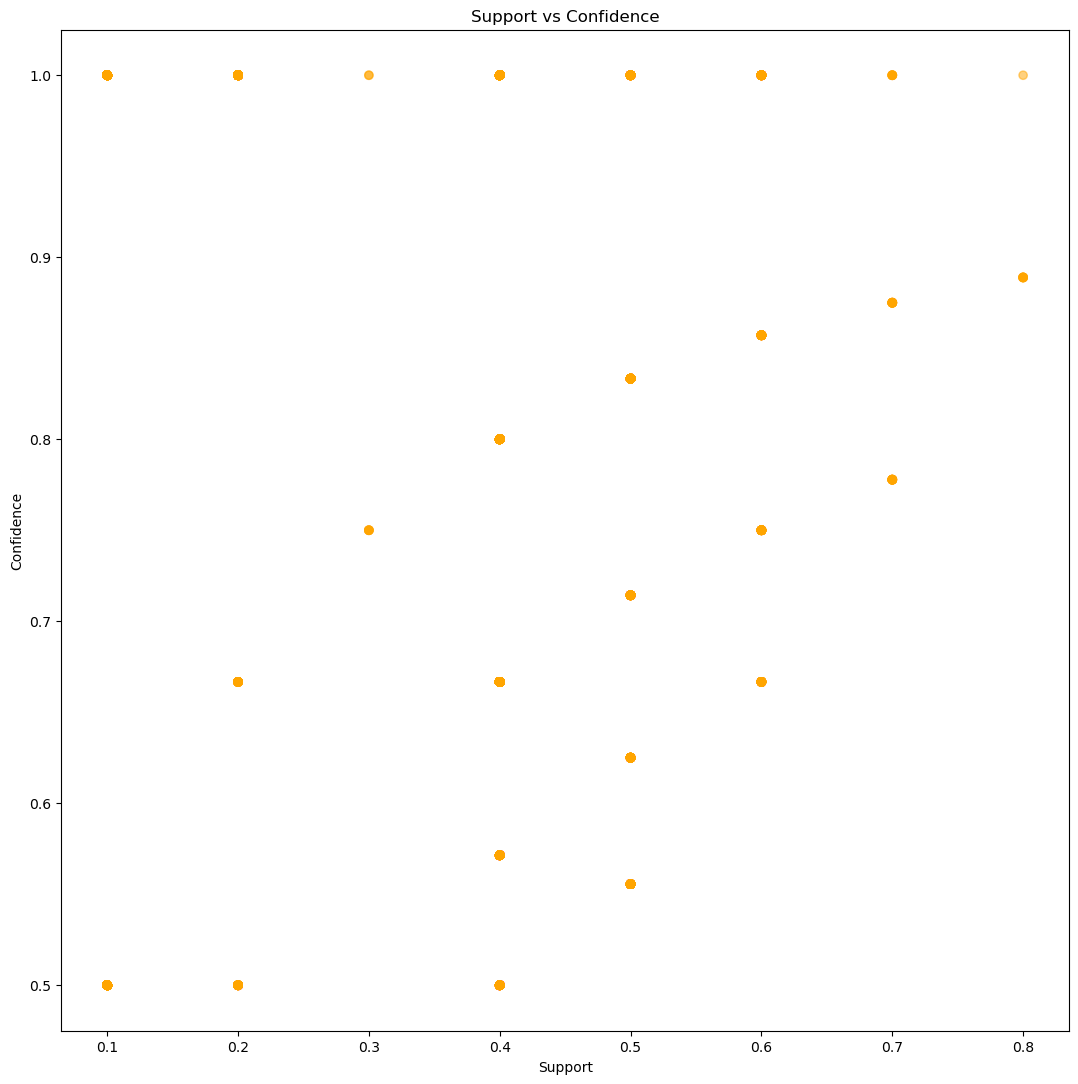

In [21]:
threshold = 0.5
rules2['color'] = ['orange' if conf >= threshold else 'blue' for conf in rules2['confidence']]
plt.scatter(rules2['support'], rules2['confidence'], c=rules2['color'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')


In [22]:
##---Apriori algorithm for min-support =0.2

frequent_itemsets2=apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets2


,support,itemsets
0,0.4,(V1)
1,0.9,(V2)
2,0.9,(V3)
3,0.8,(V4)
4,0.9,(V5)
...,...,...
182,0.4,"(V3, V2, Patriot, Sixth Sense, V4, Gladiator)"
183,0.4,"(V5, V3, V2, Patriot, Sixth Sense, Gladiator)"
184,0.4,"(V5, V2, Patriot, Sixth Sense, V4, Gladiator)"
185,0.4,"(V5, V3, Patriot, Sixth Sense, V4, Gladiator)"


In [23]:
rules3 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V2),(V1),0.9,0.4,0.3,0.333333,0.833333,-0.06,0.90,-0.666667
1,(V1),(V2),0.4,0.9,0.3,0.750000,0.833333,-0.06,0.40,-0.250000
2,(V1),(V3),0.4,0.9,0.4,1.000000,1.111111,0.04,inf,0.166667
3,(V3),(V1),0.9,0.4,0.4,0.444444,1.111111,0.04,1.08,1.000000
4,(V1),(V4),0.4,0.8,0.2,0.500000,0.625000,-0.12,0.40,-0.500000
...,...,...,...,...,...,...,...,...,...,...
2329,(V2),"(V5, V3, Patriot, Sixth Sense, V4, Gladiator)",0.9,0.4,0.4,0.444444,1.111111,0.04,1.08,1.000000
2330,(Patriot),"(V5, V3, V2, Sixth Sense, V4, Gladiator)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.80,1.000000
2331,(Sixth Sense),"(V5, V3, V2, Patriot, V4, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.50,0.625000
2332,(V4),"(V5, V3, V2, Patriot, Sixth Sense, Gladiator)",0.8,0.4,0.4,0.500000,1.250000,0.08,1.20,1.000000


Text(0.5, 1.0, 'Support vs Confidence')

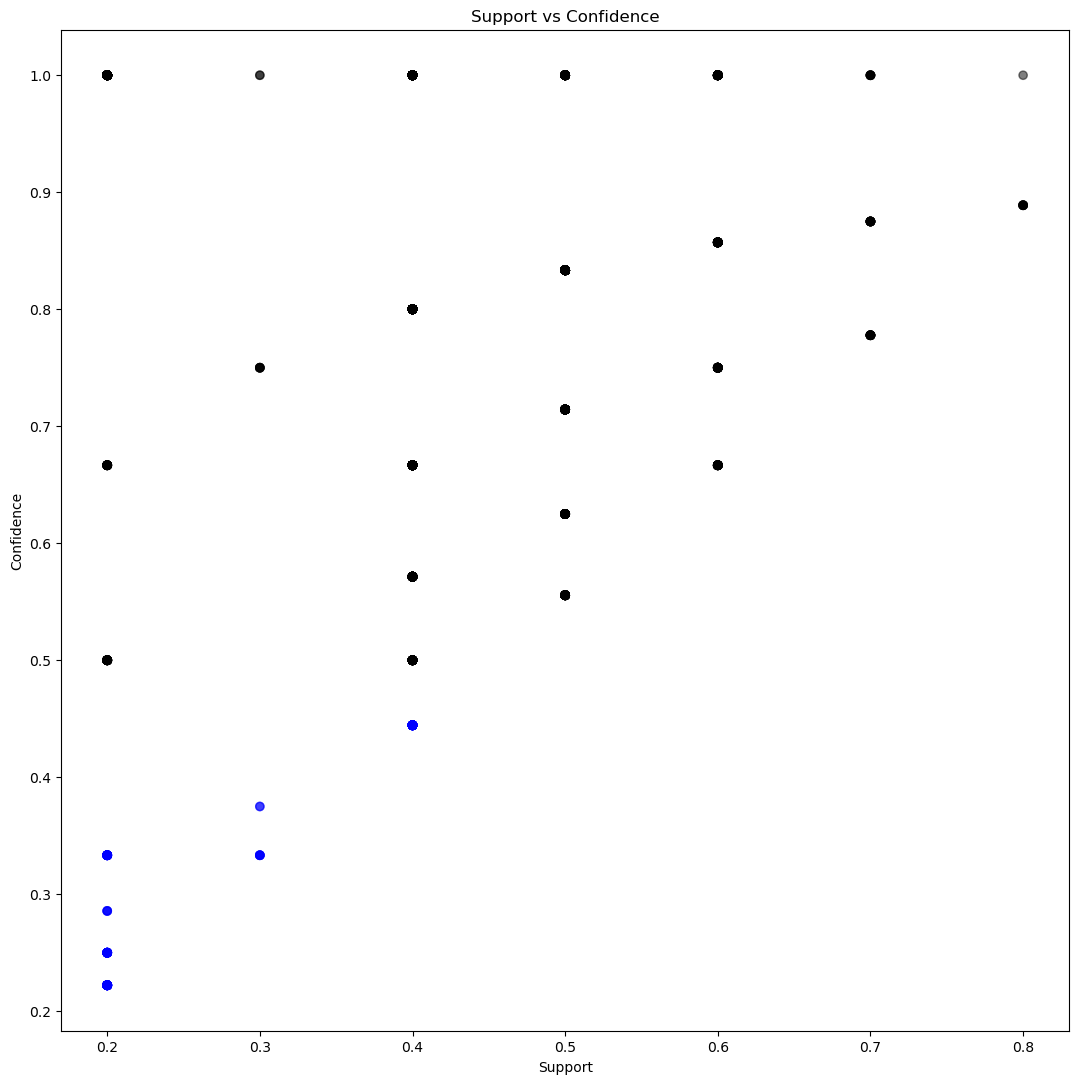

In [24]:
threshod = 0.1
rules3['color'] = ['black' if conf >= threshold else 'blue' for conf in rules3['confidence']]
plt.scatter(rules3['support'], rules3['confidence'], c=rules3['color'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')

In [25]:
##-Rules when min_support = 0.1 and min_threshold for confidence is 0.5

rules4 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V1),(V2),0.4,0.9,0.3,0.750000,0.833333,-0.06,0.4,-0.250000
1,(V1),(V3),0.4,0.9,0.4,1.000000,1.111111,0.04,inf,0.166667
2,(V1),(V4),0.4,0.8,0.2,0.500000,0.625000,-0.12,0.4,-0.500000
3,(V1),(V5),0.4,0.9,0.3,0.750000,0.833333,-0.06,0.4,-0.250000
4,(V1),(Sixth Sense),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000
...,...,...,...,...,...,...,...,...,...,...
2140,"(V4, Gladiator)","(V5, V3, V2, Patriot, Sixth Sense)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
2141,(Patriot),"(V5, V3, V2, Sixth Sense, V4, Gladiator)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
2142,(Sixth Sense),"(V5, V3, V2, Patriot, V4, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
2143,(V4),"(V5, V3, V2, Patriot, Sixth Sense, Gladiator)",0.8,0.4,0.4,0.500000,1.250000,0.08,1.2,1.000000


In [26]:
rules4 = rules4.sort_values(['confidence', 'lift'], ascending =[False, False])
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
63,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000,0.16,inf,1.0
64,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000,0.16,inf,1.0
123,"(V1, Sixth Sense)",(Green Mile),0.2,0.2,0.2,1.0,5.000,0.16,inf,1.0
124,(Green Mile),"(V1, Sixth Sense)",0.2,0.2,0.2,1.0,5.000,0.16,inf,1.0
126,"(LOTR2, V1)",(LOTR1),0.2,0.2,0.2,1.0,5.000,0.16,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
70,(V1),"(V2, V5)",0.4,0.8,0.2,0.5,0.625,-0.12,0.4,-0.5
90,"(V1, V3)",(V4),0.4,0.8,0.2,0.5,0.625,-0.12,0.4,-0.5
120,(V1),"(V4, V5)",0.4,0.8,0.2,0.5,0.625,-0.12,0.4,-0.5
366,"(V1, V3)","(V2, V5)",0.4,0.8,0.2,0.5,0.625,-0.12,0.4,-0.5


Text(0.5, 1.0, 'Support vs Confidence')

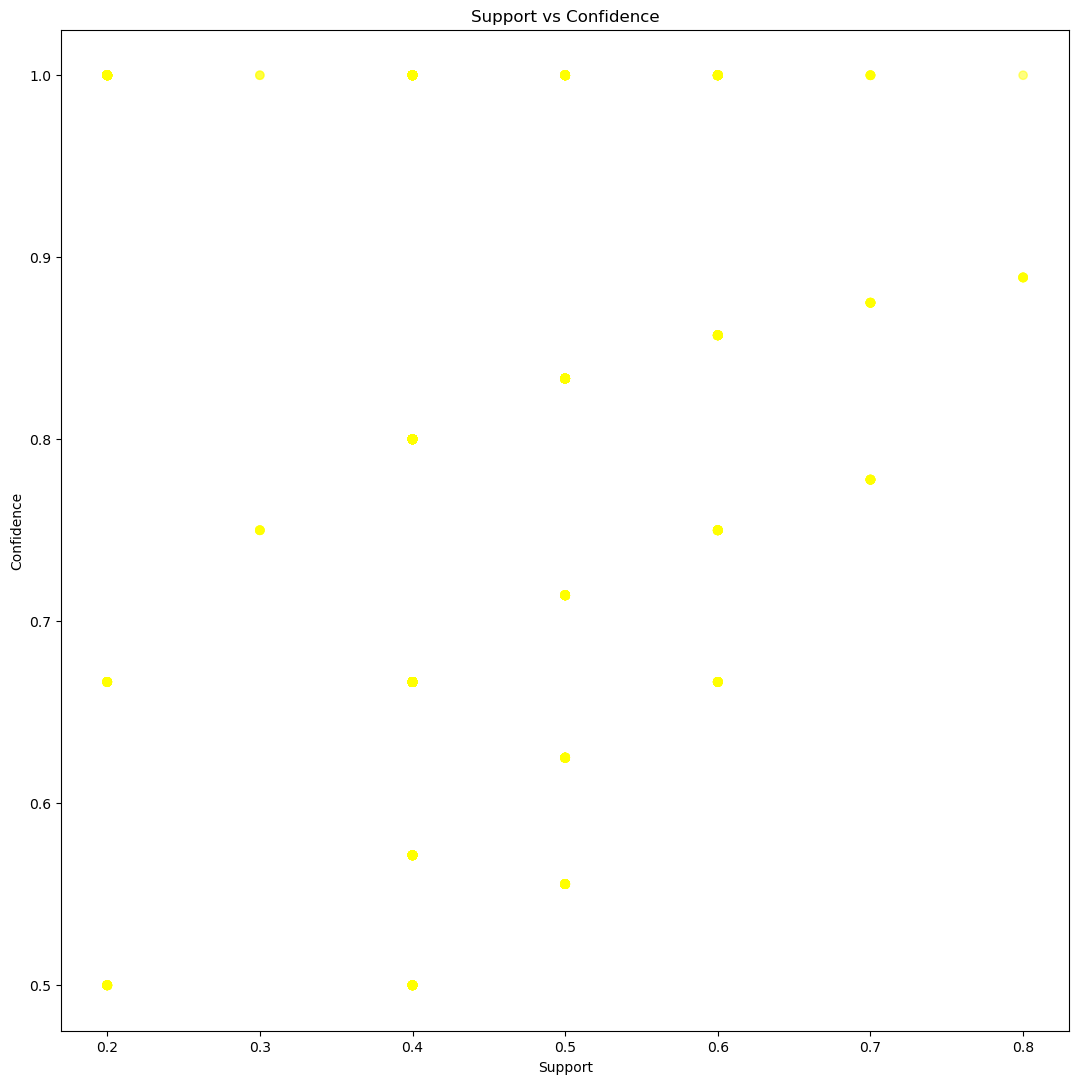

In [27]:
threshod = 0.5
rules4['color'] = ['yellow' if conf >= threshold else 'blue' for conf in rules4['confidence']]
plt.scatter(rules4['support'], rules4['confidence'], c=rules4['color'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')